Lecture 4 live code - Visualization - Darshan Panesar

In [1]:
#load libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL #Python Imaging Library
import requests
import os


In [2]:
#specify data: generate random sample data

np.random.seed(613)
x1 = np.arange(50)
y1 = np.random.randint(0, 75,50)
x2 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y2 = np.array([110, 180, 240, 99, 220])

/var/folders/9x/dw5cr46n08g4vy82170wdts40000gn/T/ipykernel_22025/1264709698.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


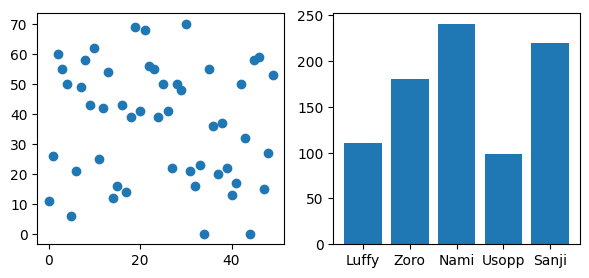

In [3]:
#Here we want to have two plots next to each other, so we just have to define multiple axes and their relative positions:

fig,(ax1, ax2) = plt.subplots(ncols=2, 
                              nrows=1, 
                              figsize=(7, 3))

#We want to then generate a scatter plot and a bar plot
ax1.scatter(x1,y1)
ax2.bar(x2,y2)
fig.show()

/var/folders/9x/dw5cr46n08g4vy82170wdts40000gn/T/ipykernel_22025/1577417641.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


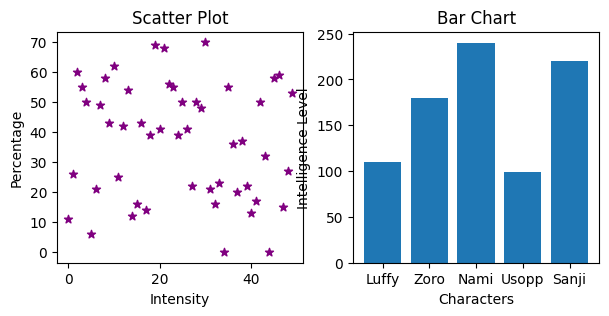

In [4]:
#Modify figures - customize the plots
fig,(ax1, ax2) = plt.subplots(ncols=2, 
                              nrows=1, 
                              figsize=(7, 3))

#Customizations:
ax1.set_title("Scatter Plot")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Percentage")

ax2.set_title("Bar Chart")
ax2.set_xlabel("Characters")
ax2.set_ylabel("Intelligence Level")

#We want to then generate a scatter plot and a bar plot
ax1.scatter(x1,y1,
            marker='*', # NEW ADDITIONS the maker is changed to a $ sign
            color = "purple") # NEW ADDITIONS colour is changed to purple)

ax2.bar(x2,y2)
fig.show()


Subplots without a grid arrangement

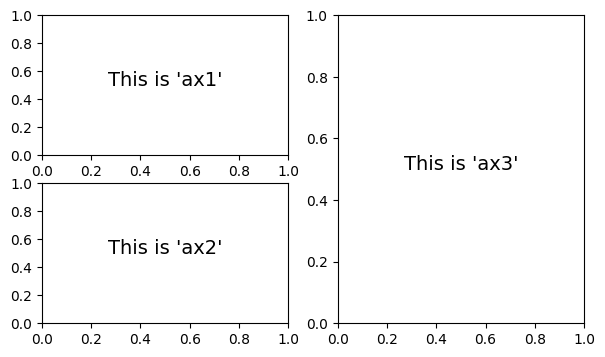

In [5]:
#Subplots: here we arrange the subplots within our figure by using teh function plt.subplot_mosaic()

fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'], 
                                    ['ax2', 'ax3']], 
                                    figsize=(7, 4))

#Each axes in our subplot_mosaic() function has a ‘label:

for label, ax in someaxes.items():
    ax.text(0.5, 0.5, f'This is {label!r}', 
        fontsize=14, 
        ha = 'center', 
        transform=ax.transAxes)


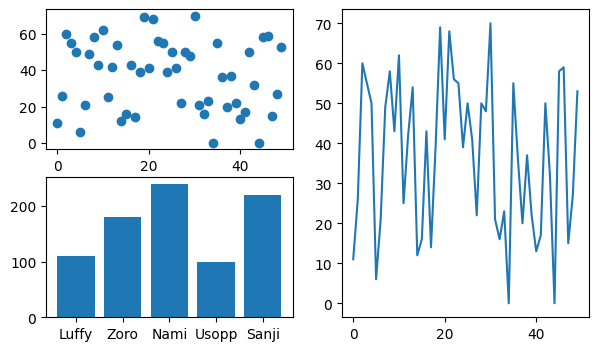

In [6]:
#Here we are adding data to each of our subplots by referencing to the specific axes we previously defined

fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'], 
                                    ['ax2', 'ax3']], 
                                    figsize=(7, 4))

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)

plt.show()

Modifying Figure Layouts

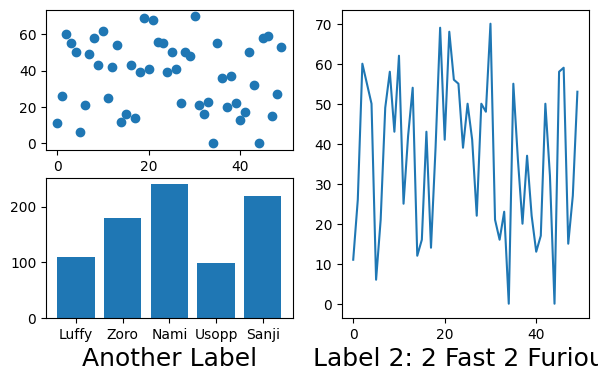

In [7]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3']],
                                    figsize=(7, 4))


someaxes["ax1"].scatter(x1, y1)
someaxes["ax2"].bar(x2, y2)
someaxes["ax3"].plot(x1, y1) 
someaxes["ax1"].set_xlabel('A Big Label', fontsize=18) #Adding a label for ax1 x axis with the fontsize of 18
someaxes["ax2"].set_xlabel('Another Label', fontsize=18) #Adding a label for ax2 x axis with the fontsize of 18
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious', fontsize=18) #Adding a label for ax3 x axis with the fontsize of 18 


plt.show()

^ Note the axis label gets cut off so... layout is key here!

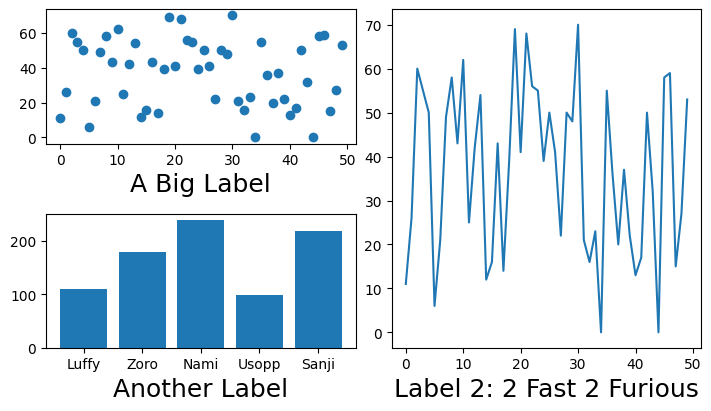

In [8]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3']],
                                    figsize=(7, 4),
                                    layout = "constrained") #Here we add the function layout = "constrained" to make sure that the subplots are aligned within the area


someaxes["ax1"].scatter(x1, y1)
someaxes["ax2"].bar(x2, y2)
someaxes["ax3"].plot(x1, y1) 
someaxes["ax1"].set_xlabel('A Big Label', fontsize=18) #Adding a label for ax1 x axis with the fontsize of 18
someaxes["ax2"].set_xlabel('Another Label', fontsize=18) #Adding a label for ax2 x axis with the fontsize of 18
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious', fontsize=18) #Adding a label for ax3 x axis with the fontsize of 18 


plt.show()

MULTIPLE VISUALIZATIONS!

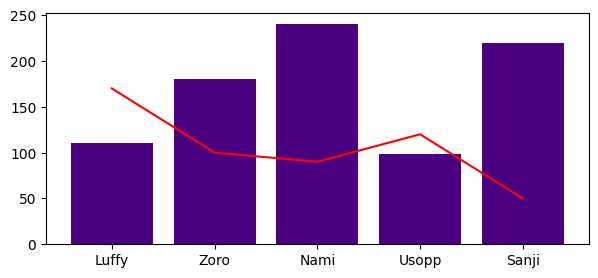

In [9]:
#Multiple plots on the same axes (visualizations)
#Note: Annotations, shapes, etc. can be added as usual!

# First we make our sample data:
x = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])
y2 = np.array([170, 100, 90, 120, 50])

# We define our figure and axes - (just one this time)
fig, ax = plt.subplots(figsize=(7, 3))

# We can now call both bar and plot elements to the same axes (ax)
ax.bar(x, y1, color="indigo")
ax.plot(x, y2, color="red")

plt.show()

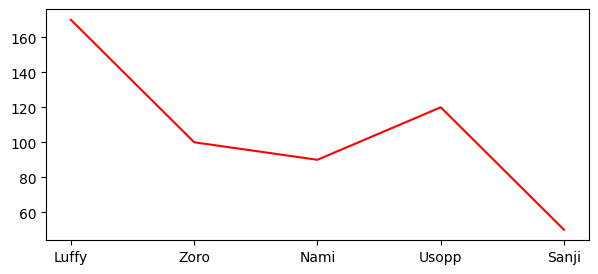

In [10]:
#We can add error information e.g., error bars from standard deviation or other
y2_sd = np.std(y2)

#Then we plot our line as:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")


<ErrorbarContainer object of 3 artists>

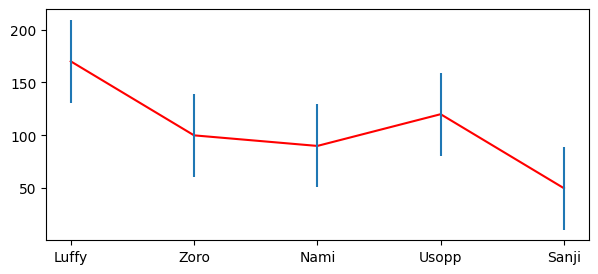

In [18]:
#We can use the errorbar() to add in our error line:

#Here specifies that we’re plotting vertical error bars
#fmt makes sure we’re not plotting the actual data points, only the error

#Then we plot our line as:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")

#Example below:

ax.errorbar(x, #our x values 
            y2, #our y values 
            yerr = y2_sd, 
            fmt = "none")


<ErrorbarContainer object of 3 artists>

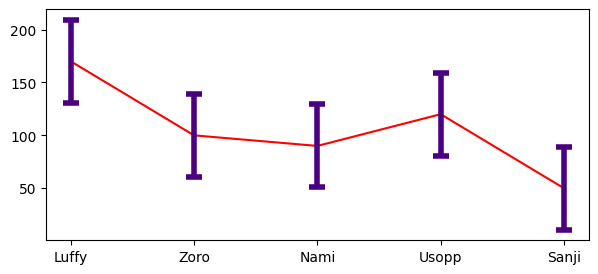

In [12]:
#We can also customize the error bars:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2,
        color = "red")

ax.errorbar(x,y2, 
            yerr = y2_sd, 
            fmt = "none", 
            ecolor= "indigo", 
            elinewidth= 4, 
            capsize = 6, 
            capthick= 4)

<ErrorbarContainer object of 3 artists>

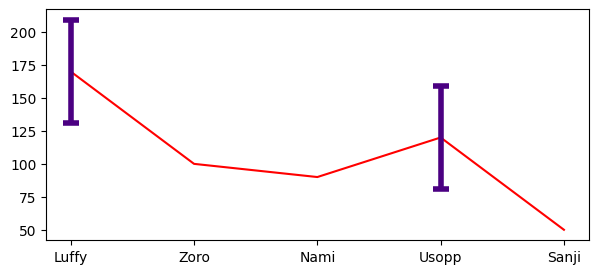

In [20]:
#Further if we want to customize the error bars:
    #We don’t want to see error bars for every single point, we can specify intervals using "errorevery"

#Then we plot our line as:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")

ax.errorbar(x,y2, 
            yerr = y2_sd, 
            fmt = "none", 
            ecolor= "indigo", 
            elinewidth= 4, 
            capsize = 6, 
            capthick= 4, 
            errorevery = 3) #can be modified for whatever needed

ADDING IMAGES TO PLOTS!!

In [14]:
from PIL import Image # to open images
import requests # to get images from URLs
from io import BytesIO # to store images

In [ ]:
#get image file from link and assign it so we can use it 
response = requests.get('https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png')
image_file = BytesIO(response.content)
image = Image.open(image_file)


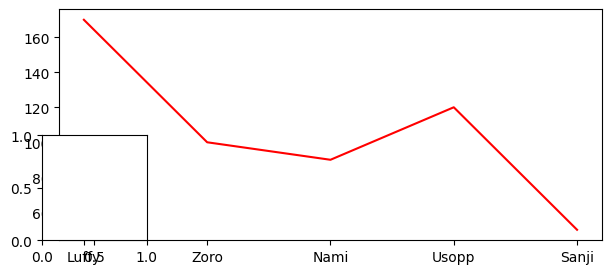

In [ ]:
#Making a basic line plot reusing the previous data (see above):
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, 
        color = "red")

#Here we overlay a new axis image on our figure (the ax plot) which acts as a container for our image:

ax_image = fig.add_axes([0.1, # x coordinate (ON FIGURE, NOT AXES) 
                         0.11, # y coordinate (ON FIGURE, NOT AXES) 
                         0.15, # image width 
                         0.35] # image height)
)

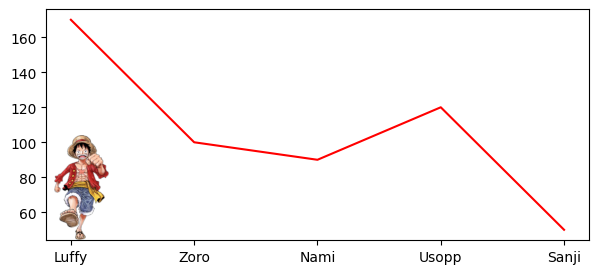

In [31]:
#Making a basic line plot reusing the previous data (see above):
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, 
        color = "red")

#Here we overlay a new axis image on our figure (the ax plot) which acts as a container for our image:

ax_image = fig.add_axes([0.1, # x coordinate (ON FIGURE, NOT AXES) 
                         0.11, # y coordinate (ON FIGURE, NOT AXES) 
                         0.15, # image width 
                         0.35] # image height)
)

#Now we add image show to our code to add prepped image(s):
ax_image.imshow(image)
ax_image.axis('off')
plt.show()

In [ ]:
#MORE!!! Only for our use - if needed 

Saving our visualizations

In [32]:
path = '/Users/darshs/Documents/DSI-REPOS/visualizations-module-dsi'
# can be full path or relative path
filename = '/fig1a.png'

In [33]:
plt.savefig(path+filename, dpi=300)
# note that path shouldn't end with / since filename starts with it


<Figure size 640x480 with 0 Axes>